In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [158]:
df = pd.read_csv('elapsed_time.csv', names=('n', 'time'))
df_o3 = pd.read_csv('elapsed_time_o3.csv', names=('n', 'time'))

### Without -O3 flag

LAPACK is compiled without `-O3`.

View the dataset: `df`

In [159]:
df.head()

n     time
0  50  0.00308
1  51  0.00346
2  52  0.00342
3  53  0.00331
4  54  0.00334

In [160]:
df.shape

(1466, 2)

Plot `df`:

Text(0, 0.5, 'time (seconds)')

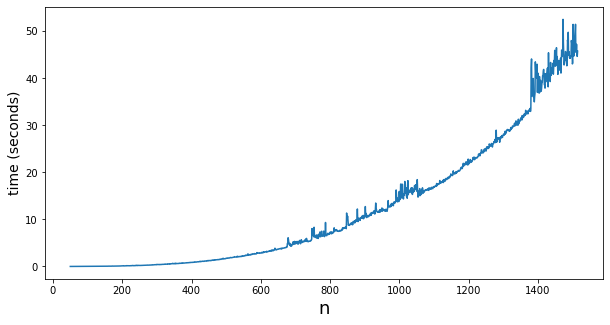

In [161]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.n, df.time)
ax.set_xlabel('n', fontsize=18)
ax.set_ylabel('time (seconds)', fontsize=14)

Plot log(time) of `df`

Text(0, 0.5, 'time (seconds)')

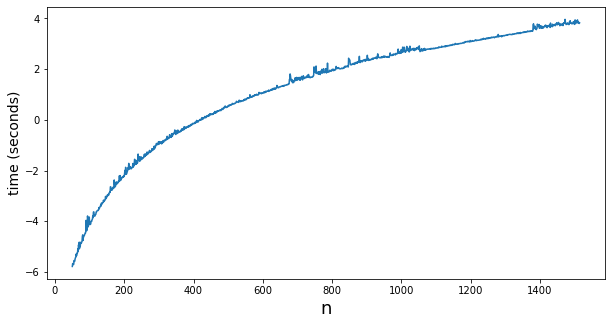

In [162]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.n, np.log(df.time))
ax.set_xlabel('n', fontsize=18)
ax.set_ylabel('time (seconds)', fontsize=14)

The graph shows that `time` might be $O(n^k)$ with $k \geq 2$. I use `sklearn` to find k, assuming that $2 \leq k \leq 3$ since theoretically, $k == 3$.

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline((
    ('poly', PolynomialFeatures()),
    ('reg', LinearRegression()),
))

search = GridSearchCV(pipe, {
    'poly__degree': [2, 3],
}, n_jobs=-1)

search.fit(df[['n']], df['time'])
search.best_params_

{'poly__degree': 3}

In [164]:
poly = PolynomialFeatures(degree=3)
reg = LinearRegression()
reg.fit(poly.fit_transform(df[['n']]), df.time)

reg.coef_

array([ 0.00000000e+00,  6.95078817e-03, -1.09490232e-05,  1.81415851e-08])

The scaling is $O(n^3)$ ($1.814n^3 - 1.095n^2 + 6.951n$). Plot $O(n^3)$

Text(0, 0.5, 'time (seconds)')

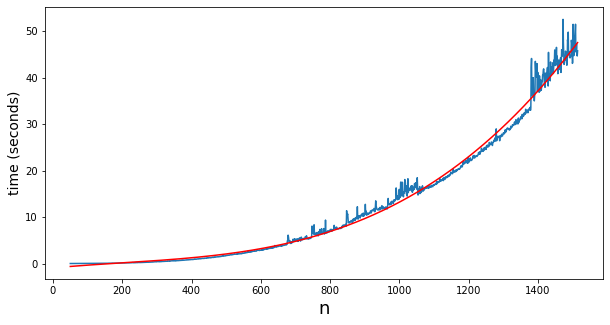

In [165]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.n, df.time)
ax.plot(df.n, search.predict(df[['n']]), color='red')
ax.set_xlabel('n', fontsize=18)
ax.set_ylabel('time (seconds)', fontsize=14)

### With -O3 flag

View the dataset `df_o3`

In [166]:
df_o3.head()

n     time
0  50  0.00081
1  51  0.00091
2  52  0.00090
3  53  0.00091
4  54  0.00091

The time when compiling with `-O3` is less than without `-O3` averagely 76%

In [167]:
(df_o3.iloc[:df.shape[0]].time / df.time).mean()

0.24652247252552342

Plot `df_o3`:

Text(0, 0.5, 'time (seconds)')

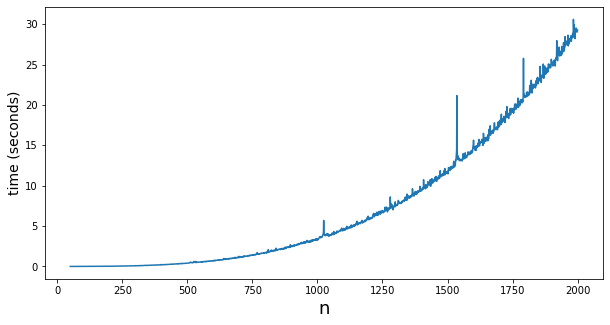

In [168]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_o3.n, df_o3.time)
ax.set_xlabel('n', fontsize=18)
ax.set_ylabel('time (seconds)', fontsize=14)

Plot log(time) of `df_o3`:

The graph shows that `time` might be $O(n^k)$ with $k \geq 2$. I use `sklearn` to find k, assuming that $2 \leq k \leq 3$ since theoretically, $k == 3$.

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline((
    ('poly', PolynomialFeatures()),
    ('reg', LinearRegression()),
))

search = GridSearchCV(pipe, {
    'poly__degree': [2, 3],
}, n_jobs=-1)

search.fit(df_o3[['n']], df_o3['time'])
search.best_params_

{'poly__degree': 3}

The result shows that the scaling is indeed $O(n^3)$. Plot $O(n^3)$

Text(0, 0.5, 'time (seconds)')

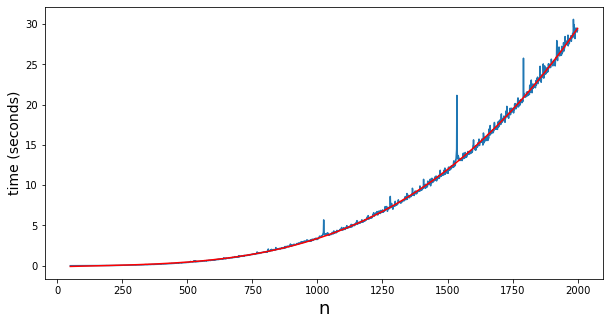

In [170]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_o3.n, df_o3.time)
ax.plot(df_o3.n, search.predict(df_o3[['n']]), color='red')
ax.set_xlabel('n', fontsize=18)
ax.set_ylabel('time (seconds)', fontsize=14)